# Avaliação de Modelos (Parte 2)

In [1]:
!pip install hypopt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.data import mnist_data
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.data import iris_data
from sklearn.metrics import accuracy_score
from scipy.stats import shapiro, friedmanchisquare

## Viés pessimista no holdout

In [3]:
X, y = mnist_data()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

print('Número de exemplos de treinamento:', y_train.shape[0])
print('Número de exemplos de trete:', y_test.shape[0])
print('Labels:', y_train)

Número de exemplos de treinamento: 3500
Número de exemplos de trete: 1500
Labels: [8 6 2 ... 9 6 9]


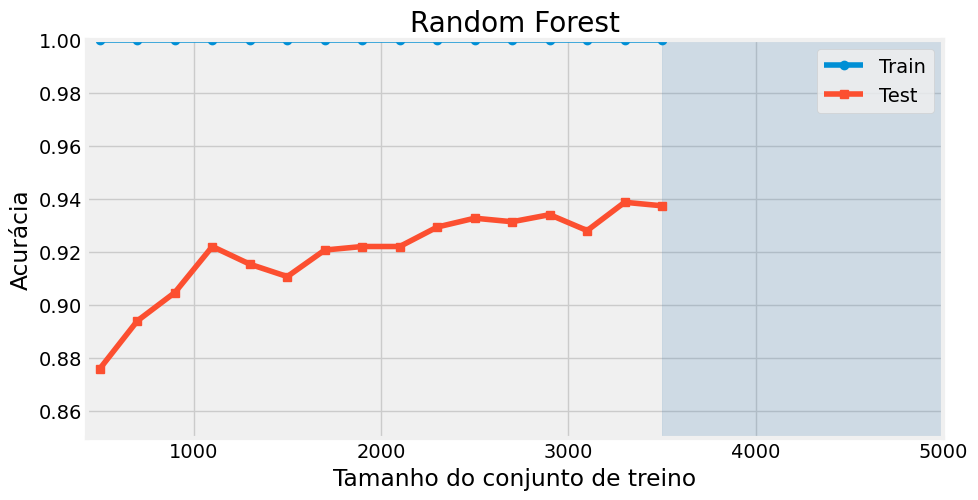

In [4]:
clf_2 = RandomForestClassifier(n_estimators = 100)

pred_train = []
pred_test = []

intervals = np.arange(500, X_train.shape[0] + 1, 200)

for i in intervals:
    clf_2.fit(X_train[:i], y_train[:i])
    p_train = clf_2.score(X_train[:i], y_train[:i])
    p_test = clf_2.score(X_test, y_test)
    pred_train.append(p_train)
    pred_test.append(p_test)

plt.figure(figsize = (10, 5))

with plt.style.context(('fivethirtyeight')):
    plt.plot(intervals, pred_train, marker = 'o', label = 'Train')
    plt.plot(intervals, pred_test, marker = 's', label = 'Test')
    plt.legend(loc = 'best', numpoints = 1)
    plt.xlim([430, X_train.shape[0] + X_test.shape[0]])
    plt.axvspan(X_train.shape[0], X_train.shape[0] + X_test.shape[0], alpha = 0.2, color = 'steelblue')
    plt.ylim([0.85, 1.0])
    plt.xlabel('Tamanho do conjunto de treino')
    plt.ylabel('Acurácia')
    plt.tight_layout()
    plt.title("Random Forest")

plt.show()

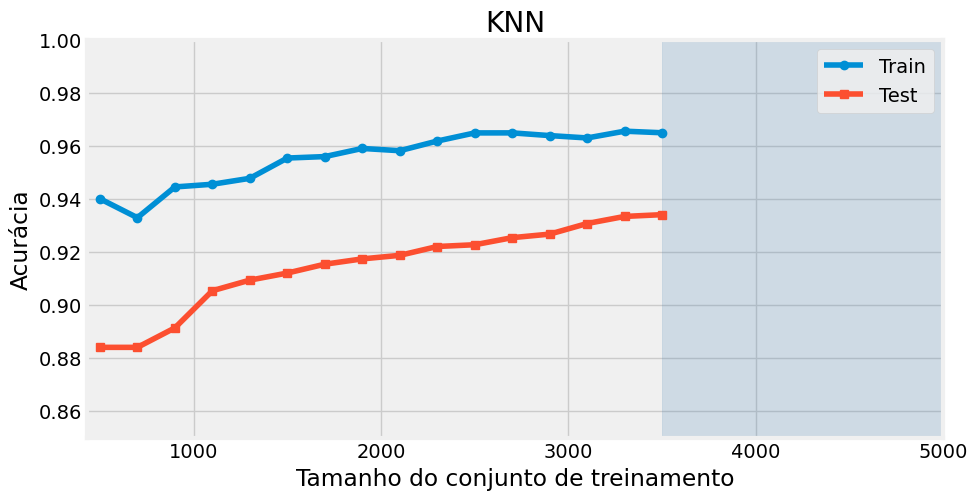

In [5]:
clf_2 = KNeighborsClassifier(n_neighbors = 3)

pred_train = []
pred_test = []

intervals = np.arange(500, X_train.shape[0] + 1, 200)

for i in intervals:
    clf_2.fit(X_train[:i], y_train[:i])
    p_train = clf_2.score(X_train[:i], y_train[:i])
    p_test = clf_2.score(X_test, y_test)
    pred_train.append(p_train)
    pred_test.append(p_test)

plt.figure(figsize = (10, 5))
    
with plt.style.context(('fivethirtyeight')):
    plt.plot(intervals, pred_train, marker = 'o', label = 'Train')
    plt.plot(intervals, pred_test, marker = 's', label = 'Test')
    plt.legend(loc = 'best', numpoints = 1)
    plt.xlim([430, X_train.shape[0] + X_test.shape[0]])
    plt.axvspan(X_train.shape[0], X_train.shape[0] + X_test.shape[0], alpha = 0.2, color = 'steelblue')
    plt.ylim([0.85, 1.0])
    plt.xlabel('Tamanho do conjunto de treinamento')
    plt.ylabel('Acurácia')
    plt.tight_layout()
    plt.title("KNN")

plt.show()

## Treinamento, validação e teste

In [6]:
X, y = iris_data()

print(np.shape(y))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

(150,)


In [7]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [2, 3, 4, 5]
}

grid = GridSearchCV(knn, param_grid = param_grid, cv = 5, scoring = 'accuracy')

In [8]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5]}, scoring='accuracy')

In [9]:
grid.cv_results_['mean_test_score']

array([0.94285714, 0.95238095, 0.94285714, 0.97142857])

In [10]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

clf = grid.best_estimator_

{'n_neighbors': 5}
0.9714285714285713
KNeighborsClassifier()


In [11]:
y_pred = clf.predict(X_test)

In [12]:
acc_test = accuracy_score(y_test, y_pred)
print(acc_test)

1.0


## Intervalo de confiança

In [13]:
ci_test = 1.96 * np.sqrt((acc_test * (1 - acc_test)) / y_test.shape[0])

test_lower = acc_test - ci_test
test_upper = acc_test + ci_test

print(test_lower, test_upper)

1.0 1.0


In [14]:
ci_test = 2.58 * np.sqrt((acc_test*(1 - acc_test)) / y_test.shape[0])

test_lower = acc_test - ci_test
test_upper = acc_test + ci_test

print(test_lower, test_upper)

1.0 1.0


## Validação cruzada

In [15]:
knn2 = KNeighborsClassifier(n_neighbors = 5)
rf = RandomForestClassifier(n_estimators = 150)
gnb = GaussianNB()

In [16]:
scoresKNN = cross_val_score(knn2, X, y, cv = 10, scoring = 'accuracy')
scoresRF = cross_val_score(rf, X, y, cv = 10, scoring = 'accuracy')
scoresNB = cross_val_score(gnb, X, y, cv = 10, scoring = 'accuracy')

In [17]:
print("KNN")
print("Acurácia em cada fold:", scoresKNN)
print("Acurácia média:", np.mean(scoresKNN))
print("Desvio padrão:", np.std(scoresKNN))

KNN
Acurácia em cada fold: [1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
Acurácia média: 0.9666666666666668
Desvio padrão: 0.04472135954999579


In [18]:
print("Random forest")
print("Acurácia em cada fold:", scoresRF)
print("Acurácia média:", np.mean(scoresRF))
print("Desvio padrão:", np.std(scoresRF))

Random forest
Acurácia em cada fold: [1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.86666667 1.         1.         1.        ]
Acurácia média: 0.96
Desvio padrão: 0.044221663871405324


In [19]:
print("Naive Bayes")
print("Acurácia em cada fold:", scoresNB)
print("Acurácia média:", np.mean(scoresNB))
print("Desvio padrão:", np.std(scoresNB))

Naive Bayes
Acurácia em cada fold: [0.93333333 0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.86666667 1.         1.         1.        ]
Acurácia média: 0.9533333333333334
Desvio padrão: 0.04268749491621898


## Teste estatístico de hipótese

In [20]:
_, pKNN = shapiro(scoresKNN)
_, pRF = shapiro(scoresRF)
_, pNB = shapiro(scoresNB)

In [21]:
print(f'P-valor KNN: {pKNN:.4f}')
print(f'P-valor RF: {pRF:.4f}')
print(f'P-valor NB: {pNB:.4f}')

P-valor KNN: 0.0021
P-valor RF: 0.0085
P-valor NB: 0.0154


Todos os modelos acima foram 'reprovados' no teste de normalidade

In [22]:
_, p_valor = friedmanchisquare(scoresKNN, scoresRF, scoresNB)

print(p_valor)

0.4723665527410128


De acordo com o p-valor do teste acima, não houve diferença estatisticamente significativa entre os modelos

<br>
<br>
<br>